In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
import warnings

In [236]:
# Create a random square and get the four corners
class Canvas:
    def __init__(self, canvas_x_dim : float, canvas_y_dim : float):
        self.canvas_x_dim = canvas_x_dim
        self.canvas_y_dim = canvas_y_dim

    def is_posible_construct_figure(self, len_side : float) -> bool:
        """ 
        This function checks if it is possible to construct a figure with length len_side.
        We assume that the figures are convex and that the points are given in a clockwise order.
        """
        # Check if the figure is inside the canvas
        if (len_side > self.canvas_x_dim) or (len_side > self.canvas_y_dim):
            return False
        else:
            return True

    def is_figure_inside_canvas(self, points : List[Tuple]) -> float:
        """ 
        This function checks if the figure is inside the canvas.
        We assume that the figures are convex and that the points are given in a clockwise order.
        """
        for point in points:
            if (point[0] < 0) or (point[0] > self.canvas_x_dim) or (point[1] < 0) or (point[1] > self.canvas_y_dim):
                return False        
        return True

    def rotate_figure(self, points : List[Tuple]) -> List[Tuple]:
        """ 
        This function implements the rotation of the figure.
        To do so, we use a rotation matrix: [[cosx, -sinx], [sinx, cosx]] for a random x between 0 and 2pi.
        """
        random_angle = np.random.uniform(0, 2 * np.pi)
        rotation_matrix = np.array([[np.cos(random_angle), -np.sin(random_angle)], [np.sin(random_angle), np.cos(random_angle)]])
        rotated_points = [np.matmul(rotation_matrix, np.array(point)) for point in points]

        return rotated_points

    def plot_canvas(self):
        """ 
        This function plots the canvas.
        """
        plt.plot([0, self.canvas_x_dim, self.canvas_x_dim, 0, 0], [0, 0, self.canvas_y_dim, self.canvas_y_dim, 0], color = 'black')
        plt.box(False)
        plt.xticks([]), plt.yticks([])

    def plot_points(self, figures : List[List[Tuple]]):
        """ 
        This function plots the points of the figure on the canvas.
        """
        plt.figure(figsize = (self.canvas_x_dim, self.canvas_y_dim))
        
        # Plot the figure
        for points in figures:
            plt.scatter([point[0] for point in points], [point[1] for point in points], color = 'gray', s = 20)

        # Plot the canvas
        self.plot_canvas()
        plt.show()

    def plot_solutions(self, figures : List[List[Tuple]]):
        """ 
        This function plots the solution on the canvas.
        """
        plt.figure(figsize = (self.canvas_x_dim, self.canvas_y_dim))
        
        # Plot the figure
        for points in figures:
            plt.plot([point[0] for point in points], [point[1] for point in points], color = 'gray', linewidth = 2)

            # This statement plot the final segment to make it closed
            plt.plot([points[0][0], points[-1][0]], [points[0][1], points[-1][1]], color = 'gray', linewidth = 2)        
        
        # Plot the canvas
        self.plot_canvas()
        plt.show()


class Square(Canvas):
    def __init__(self, canvas_x_dim : float, canvas_y_dim : float, len_side : float, rotate : bool):
        super().__init__(canvas_x_dim, canvas_y_dim)

        # Check if it is possible to construct the figure
        if not self.is_posible_construct_figure(len_side):
            raise ValueError('Is not possible to construct the figure')
        else:
            self.len_side = len_side
            self.rotate = rotate

        # Select the starting random point
        x_starting, y_starting = np.random.uniform(0, canvas_x_dim - self.len_side), np.random.uniform(0, canvas_y_dim - self.len_side)
        self.starting_point = (x_starting, y_starting)

    def create_figure(self) -> List:
        """
        This function creates a random square with length len_side. 
        The process is as follows:
        1. Randomly select a point on the canvas
        2. Randomly select a direction (left, right, up, down)
        3. Create a square with the selected point as the bottom left corner
        4. Check if the square is within the canvas
        5. If not, repeat from step 1

        args:
            len_side (float): length of the side of the square
        
        returns:
            List: list of four corners of the square
        """
        # Dictionary with all the possible directions
        directions = {
            0: np.array([-1, 0]),
            1: np.array([0, 1]),
            2: np.array([1, 0]),
            3: np.array([0, -1])
        }
        # Get the direction to start building the square
        index_direction = 0

        # Create the square
        points = [self.starting_point]
        current_point = points[0]
        for i in range(1, 4):
            current_point = current_point + self.len_side * directions[i]  
            points.append(current_point)

        # Check if the square is inside the canvas
        if self.rotate:
            points = self.rotate_figure(points)

        if self.is_figure_inside_canvas(points):
            return points
        else:
            try:
                return self.create_figure()
            except RecursionError:
                warnings.warn('There was a problem constructing the figure, return None')
                return None
            
class Triangle(Canvas):
    def __init__(self, canvas_x_dim : float, canvas_y_dim : float, len_side : float, rotate : bool):
        super().__init__(canvas_x_dim, canvas_y_dim)

        # Check if it is possible to construct the figure
        if not self.is_posible_construct_figure(len_side):
            raise ValueError('Is not possible to construct the figure')
        else:
            self.len_side = len_side
            self.rotate = rotate

        # Select the starting random point
        x_starting, y_starting = np.random.uniform(0, canvas_x_dim - self.len_side), np.random.uniform(0, canvas_y_dim - self.len_side)
        self.starting_point = (x_starting, y_starting)

    def create_figure(self) -> List:
        """
        This function creates a rectangle triangle based on a square deleting one corner
        """
        # Create the square
        square = Square(self.canvas_x_dim, self.canvas_y_dim, self.len_side, self.rotate)
        points = square.create_figure()

        # Delete one corner
        points.pop(2)

        return points

In [237]:
class Game:
    def __init__(self, x_dim_canvas, y_dim_canvas, figures : Tuple[str, float, bool]):
        self.x_dim_canvas = x_dim_canvas
        self.y_dim_canvas = y_dim_canvas
        self.figures = figures

    def create_game(self) -> List[List[Tuple]]:
        """
        This function creates a game with the given parameters
        """
        # Create the canvas
        canvas = Canvas(self.x_dim_canvas, self.y_dim_canvas)

        # Create the figures
        figures = []
        for figure in self.figures:
            if figure[0] == 'square':
                figures.append(Square(self.x_dim_canvas, self.y_dim_canvas, figure[1], figure[2]).create_figure())
            elif figure[0] == 'triangle':
                figures.append(Triangle(self.x_dim_canvas, self.y_dim_canvas, figure[1], figure[2]).create_figure())
            else:
                raise ValueError('The figure is not valid')

        return (canvas, figures)

In [274]:
# Test case for canvas
(x_dim_canvas, y_dim_canvas) = (15, 10)

figures = [
    ('square', 7, False), 
    ('triangle', 7, False), 
    ('triangle', 7, False), 
    ('square', 7, False)
]

canvas, figures = Game(x_dim_canvas, y_dim_canvas, figures).create_game()

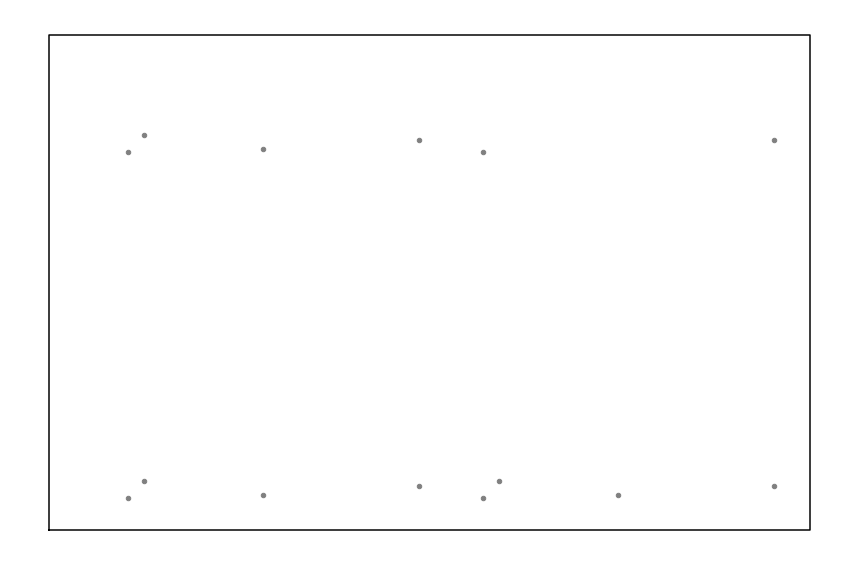

In [275]:
canvas.plot_points(figures)